# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

In [113]:
# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
5,h246,0,45.000000,0,Ketapril,Male,13,30
6,p189,0,45.000000,0,Ketapril,Male,8,28
7,n923,0,45.000000,0,Ketapril,Male,19,30
8,q119,0,45.000000,0,Ketapril,Male,17,30
9,f993,0,45.000000,0,Naftisol,Male,21,28


In [115]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].value_counts().count()

249

In [116]:
mouse_study_df.groupby('Mouse ID').size()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
a401    10
a411    10
a444    10
a457     3
a492    10
a520    10
a577     7
a644    10
a685    10
a699    10
a788     7
a818    10
a897    10
a963    10
b128    10
b313     6
b447     1
b487     6
b559    10
b742    10
b759     7
b879    10
c139    10
c264    10
c282    10
c302    10
c326     2
c402    10
c458     7
c559    10
c580     7
c757    10
c758    10
c766    10
c819     9
c832    10
c895     7
c927     9
d133     1
d164     3
d251    10
d474     9
e213    10
e227    10
e291     6
e476    10
e584    10
e662    10
f129     4
f234     8
f278     2
f345    10
f394     2
f436     4
f545    10
f932     1
f966     5
f993     5
g107     8
g288    10
g296    10
g316    10
g497    10
g558     9
g570    10
g791    10
g867     4
g989    13
h246    10
h333     7
h428     1
h531     2
i177    10
i334    10
i386     9
i477     3
i557    10
i635    10
i669     6
i738    10
i901    10
j119    10
j235     5
j246     8
j296    10
j

In [117]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [118]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']

In [126]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df['Mouse ID'].value_counts().count()

248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_tumor = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_vol_for_regimen = pd.DataFrame({
    "Mean Tumor Volume":drug_regimen_tumor.mean(),
    "Median Tumor Volume":drug_regimen_tumor.median(),
    "Tumor Volume Variance":drug_regimen_tumor.var(),
    "Tumor Volume Std. Dev.":drug_regimen_tumor.std(),
    "Tumor Volume Std. Err.":drug_regimen_tumor.sem()
})
tumor_vol_for_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [131]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

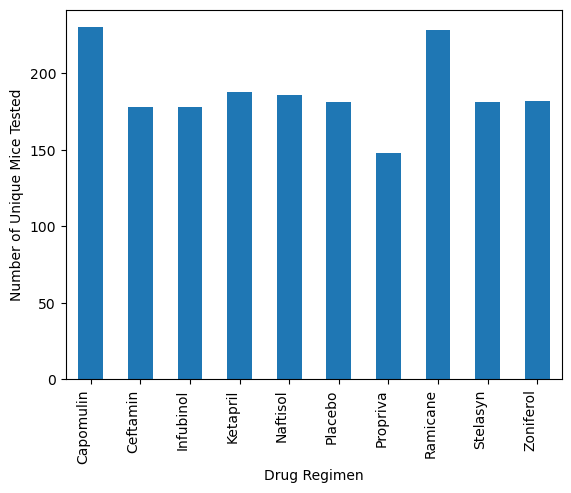

In [134]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_per_regimen = mouse_study_df.groupby('Drug Regimen')['Mouse ID'].count()

mouse_per_regimen.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.xticks(rotation=90, ha='right')
plt.show()

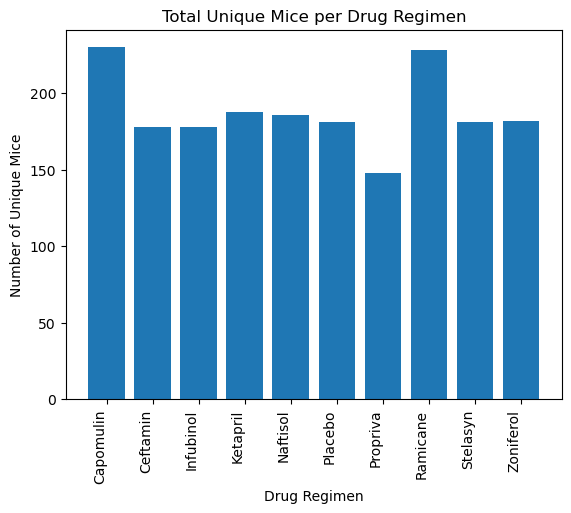

In [136]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
drug_regimen = mouse_per_regimen.index
counts = mouse_per_regimen.tolist()
plt.bar(drug_regimen, counts)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')
plt.title('Total Unique Mice per Drug Regimen')
plt.xticks(rotation=90, ha='right')
plt.show()

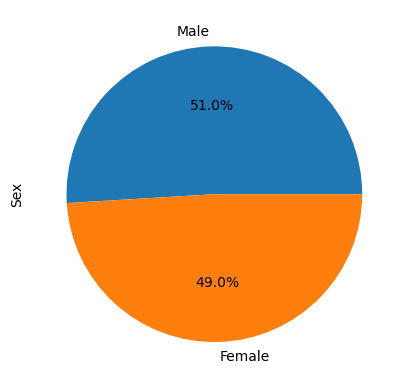

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_study_df['Sex'].value_counts()
mouse_sex.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

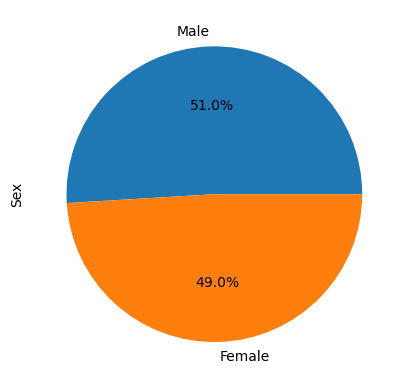

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex.index
plt.pie(mouse_sex, labels=labels, autopct='%1.1f%%', )
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [143]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
pd.set_option('display.max_rows', None)
# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_timepoint = mouse_study_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()#.agg('max')
selective_drug = mouse_greatest_timepoint.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_last_timepoint = mouse_study_df.merge(selective_drug, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='right')
tumor_vol_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

new = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.
    # Append the resulting final tumor volumes for each drug to the empty list.
    # Determine outliers using the upper and lower bounds, then print the results.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_vol_last_timepoint.loc[tumor_vol_last_timepoint['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol_list.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # upper/lower bound
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # outlier
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}") 
    print(f"{drug}'s IQR: {iqr}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's IQR: 7.781863460000004
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR: 9.098536719999998
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's IQR: 11.477135160000003
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's IQR: 15.577752179999997


C:\Users\lyngu\AppData\Local\Temp\ipykernel_20412\3422439388.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(tumor_vol_list, labels=treatment_list, flierprops={'markerfacecolor': 'red'})


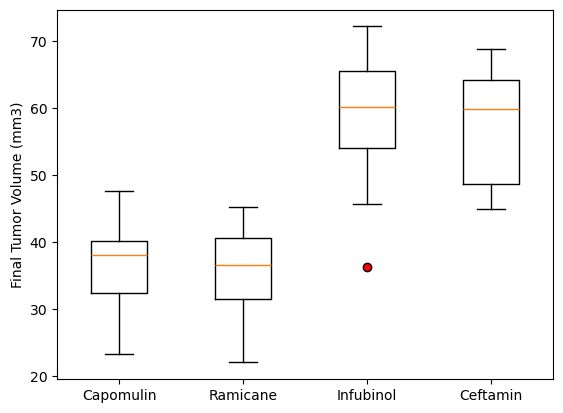

In [147]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, labels=treatment_list, flierprops={'markerfacecolor': 'red'})
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

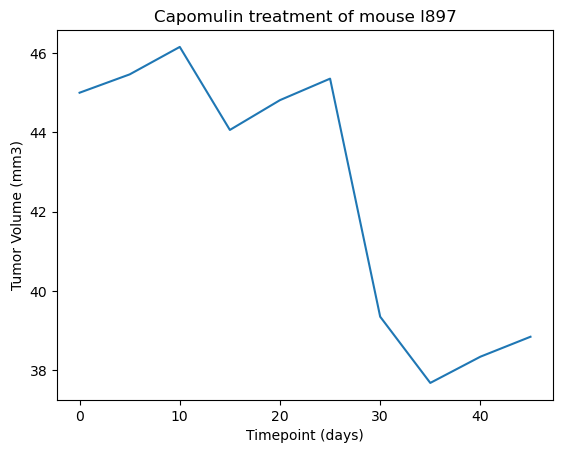

In [199]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = tumor_vol_last_timepoint.loc[(tumor_vol_last_timepoint['Drug Regimen'] == 'Capomulin'), ['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint', 'Weight (g)']]
mouse_treated = random.choice(capomulin_data['Mouse ID'])
capomulin_mouse_select = mouse_study_df.loc[mouse_study_df['Mouse ID'] == mouse_treated]
plt.plot(capomulin_mouse_select['Timepoint'], capomulin_mouse_select['Tumor Volume (mm3)'])
plt.title(f"Capomulin treatment of mouse {mouse_treated}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

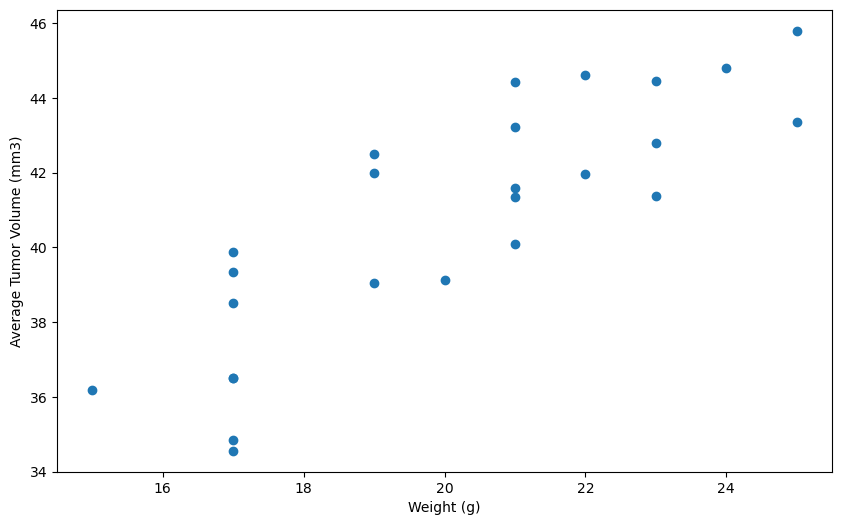

In [203]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume  = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

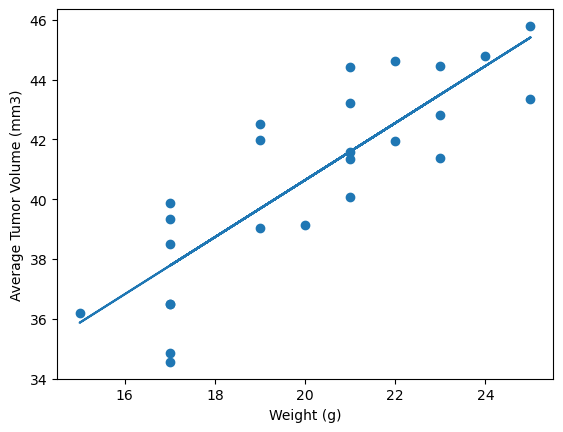

In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
capomulin_values = merged_data['Weight (g)'] * slope + intercept
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], capomulin_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()